Logistic
 Regression



 Predicting Hospital Readmission Using Logistic Regression
    Dataset: 
Hospital Readmission Dataset
    Preprocessing Steps:
Handle missing values (e.g., fill missing values with mode for categorical variables).
Encode categorical variables (e.g., one-hot encoding for hospital type, region, etc.).
Standardize numerical features.
    Task:
Implement logistic regression to predict hospital readmission and evaluate the model using precision, recall, and F1-score.




In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

data = pd.read_csv('hospital_readmissions.csv')
print(data)
print(data.info())
data.dropna()
print(data.info())

features = data.drop(columns=['readmitted'])
target = data['readmitted']

catFeatures = features.select_dtypes(include=['object']).columns
imputerCat = SimpleImputer(strategy='most_frequent')
features[catFeatures] = imputerCat.fit_transform(features[catFeatures])

features = pd.get_dummies(features, columns=catFeatures)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

precisionScore = precision_score(y_test, y_pred, pos_label='yes')
print(f"Precision: {precisionScore:.2f}")

recallScore = recall_score(y_test, y_pred, pos_label='yes')
print(f"Recall: {recallScore:.2f}")

f1Score = f1_score(y_test, y_pred, pos_label='yes')
print(f"F1-Score: {f1Score:.2f}")



           age  time_in_hospital  n_lab_procedures  n_procedures  \
0      [70-80)                 8                72             1   
1      [70-80)                 3                34             2   
2      [50-60)                 5                45             0   
3      [70-80)                 2                36             0   
4      [60-70)                 1                42             0   
...        ...               ...               ...           ...   
24995  [80-90)                14                77             1   
24996  [80-90)                 2                66             0   
24997  [70-80)                 5                12             0   
24998  [70-80)                 2                61             3   
24999  [50-60)                10                37             1   

       n_medications  n_outpatient  n_inpatient  n_emergency  \
0                 18             2            0            0   
1                 13             0            0        

4. Predicting Loan Approval Using Logistic Regression

Dataset: 
Loan Prediction Dataset
Preprocessing Steps:
Handle missing values (e.g., fill missing values with mode for categorical variables).
Encode categorical variables (e.g., one-hot encoding for gender, married status, etc.).
Standardize numerical features.
Task: 
Implement logistic regression to predict loan approval and evaluate the model using accuracy and confusion matrix.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        10000 non-null  int64  
 1   emp_title                         9167 non-null   object 
 2   emp_length                        9183 non-null   float64
 3   state                             10000 non-null  object 
 4   homeownership                     10000 non-null  object 
 5   annual_income                     10000 non-null  float64
 6   verified_income                   10000 non-null  object 
 7   debt_to_income                    9976 non-null   float64
 8   annual_income_joint               1495 non-null   float64
 9   verification_income_joint         1455 non-null   object 
 10  debt_to_income_joint              1495 non-null   float64
 11  delinq_2y                         10000 non-null  int64  
 12  month

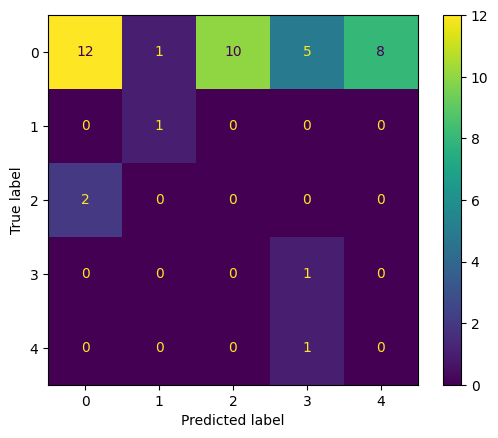

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv('loans_full_schema.csv')
print(data.info())
data = data.dropna()

data['homeownership'].fillna(data['homeownership'].mode()[0], inplace=True)
data['annual_income'].fillna(data['annual_income'].median(), inplace=True)
data['annual_income_joint'].fillna(data['annual_income_joint'].median(), inplace=True)

features = data.drop(columns=['loan_status'])
target = data['loan_status']

categorical_features = features.select_dtypes(include=['object']).columns
features = pd.get_dummies(features, columns=categorical_features)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracyScore = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracyScore:.2f}")

confusionMatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confusionMatrix).plot()

Decision Trees

Classifying Loan Status Using Decision Trees
    Dataset: 
Lending Club Loan Data
    Preprocessing Steps:
Handle missing values if any.
Encode categorical variables (e.g., one-hot encoding for loan grade, sub-grade, etc.).
Standardize numerical features.
    Task: 
Implement a decision tree classifier to classify loan status and evaluate the model using accuracy and ROC-AUC






In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv("loans_full_schema.csv") 
print(data.info())
data = data.dropna()

features = data.drop(columns=['loan_status'])
target = data['loan_status']

categorical_features = features.select_dtypes(include=['object']).columns
features = pd.get_dummies(features, columns=categorical_features)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)

accuracy_score_value = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score_value:.2f}")

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print(f"ROC-AUC Score: {roc_auc:.2f}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        10000 non-null  int64  
 1   emp_title                         9167 non-null   object 
 2   emp_length                        9183 non-null   float64
 3   state                             10000 non-null  object 
 4   homeownership                     10000 non-null  object 
 5   annual_income                     10000 non-null  float64
 6   verified_income                   10000 non-null  object 
 7   debt_to_income                    9976 non-null   float64
 8   annual_income_joint               1495 non-null   float64
 9   verification_income_joint         1455 non-null   object 
 10  debt_to_income_joint              1495 non-null   float64
 11  delinq_2y                         10000 non-null  int64  
 12  month

5. Classifying Wine Quality Using Decision Trees

Dataset: 
Wine Quality Dataset
Preprocessing Steps:
Handle missing values if any.
Standardize features.
Encode categorical variables if present.
Task:
Implement a decision tree classifier to classify wine quality (good/bad) and evaluate the model using accuracy and ROC-AUC.




In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('WineQT.csv')
print(data)
print(data.info())
data = data.dropna()

X = data.drop(columns=['quality', 'Id'])
y = data['quality']

y = (y>=6).astype(int)
scaler = StandardScaler()
xScaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(xScaled, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  

accuracyScore = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracyScore:.4f}')

rocAuc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC: {rocAuc:.4f}')


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  


3. Classifying Digit Images Using Decision Trees
    Dataset: 
MNIST Dataset
    Preprocessing Steps:
Normalize pixel values.
Reshape data as needed for model input.
    Task: 
Implement a decision tree classifier to classify handwritten digits and evaluate the model using accuracy and confusion matrix.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB
None
Accuracy Score: 0.88


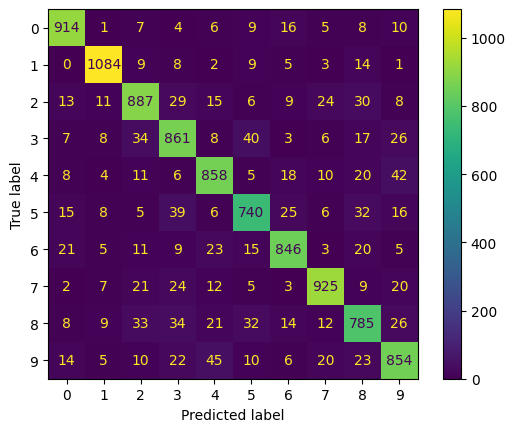

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

trainData = pd.read_csv('mnist_train.csv')
print(trainData.info())
testData = pd.read_csv('mnist_test.csv')
print(testData.info())

#Features and targets of training data
X_train = trainData.drop(columns=['label']) 
y_train = trainData['label']

#Features and targets of testing data
X_test = testData.drop(columns=['label'])  
y_test = testData['label']

#Normalizing pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracyScore = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracyScore:.2f}')

confusionMatrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusionMatrix)
disp.plot()
